In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('players_20.csv')
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [5]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [7]:
df.isnull().sum().sort_values(ascending=False).head(20)

loaned_from             17230
nation_position         17152
nation_jersey_number    17152
player_tags             16779
gk_speed                16242
gk_diving               16242
gk_handling             16242
gk_reflexes             16242
gk_kicking              16242
gk_positioning          16242
player_traits           10712
lf                       2036
lw                       2036
rs                       2036
physic                   2036
defending                2036
dribbling                2036
passing                  2036
shooting                 2036
st                       2036
dtype: int64

In [9]:
df.describe().T[['mean', 'std', 'min', 'max']].head(15)

,mean,std,min,max
sofifa_id,2.197389e+05,2.796020e+04,768.0,252905.0
age,2.528329e+01,4.656964e+00,16.0,42.0
height_cm,1.813622e+02,6.756961e+00,156.0,205.0
weight_kg,7.527634e+01,7.047744e+00,50.0,110.0
overall,6.624499e+01,6.949953e+00,48.0,94.0
potential,7.154689e+01,6.139669e+00,49.0,95.0
value_eur,2.484038e+06,5.585481e+06,0.0,105500000.0
wage_eur,9.456943e+03,2.135171e+04,0.0,565000.0
international_reputation,1.103184e+00,3.788605e-01,1.0,5.0
weak_foot,2.944250e+00,6.646562e-01,1.0,5.0


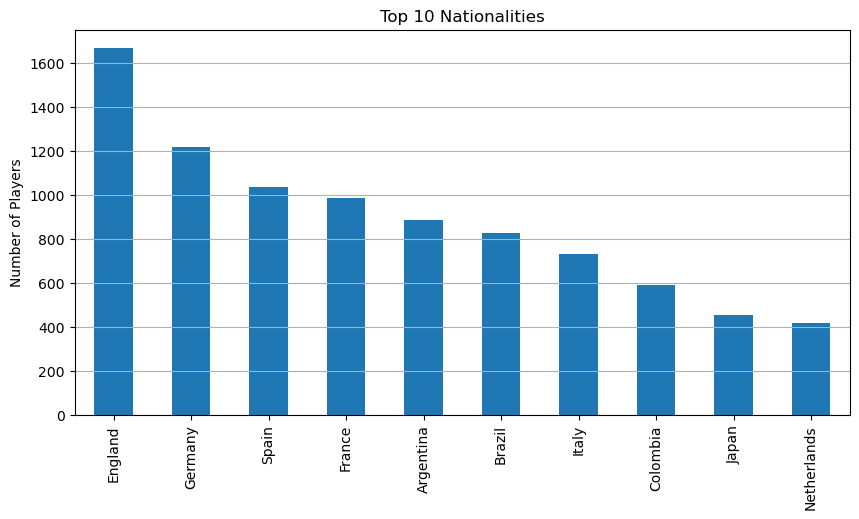

In [11]:
top_countries = df['nationality'].value_counts().head(10)
top_countries.plot(kind='bar', figsize=(10, 5), title='Top 10 Nationalities')
plt.ylabel('Number of Players')
plt.grid(axis='y')
plt.show()

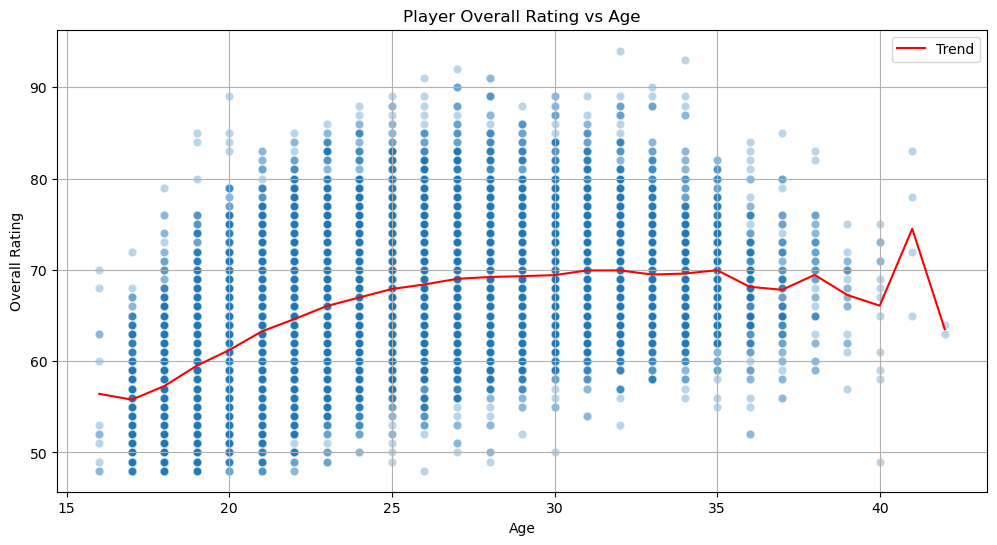

In [13]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='age', y='overall', alpha=0.3)
sns.lineplot(data=df, x='age', y='overall', ci=None, color='red', label='Trend')
plt.title('Player Overall Rating vs Age')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.grid(True)
plt.legend()
plt.show()

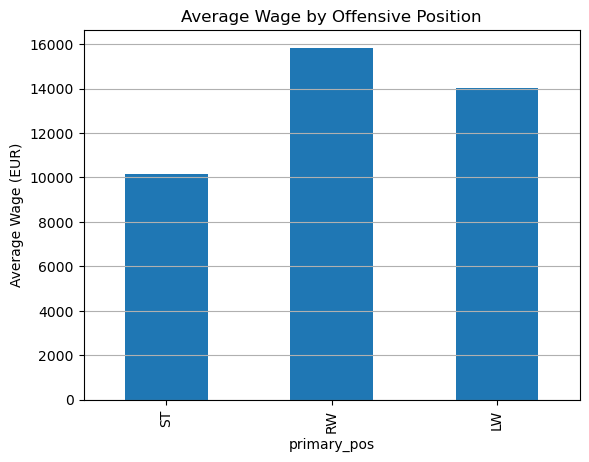

In [31]:
offensive = df[df['player_positions'].str.contains('ST|RW|LW', na=False)]
offensive['primary_pos'] = offensive['player_positions'].apply(lambda x: x.split(',')[0])
# Compare average wages
wage_by_pos = offensive.groupby('primary_pos')['wage_eur'].mean()
wage_by_pos[['ST', 'RW', 'LW']].plot(kind='bar', title='Average Wage by Offensive Position')
plt.ylabel('Average Wage (EUR)')
plt.grid(axis='y')
plt.show()

In [19]:
skill_columns = [
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
    'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve',
    'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
    'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
    'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping',
    'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression',
    'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
    'mentality_penalties', 'mentality_composure', 'defending_marking',
    'defending_standing_tackle', 'defending_sliding_tackle'
]
skills_df = df[skill_columns].dropna()

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(skills_df)

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)

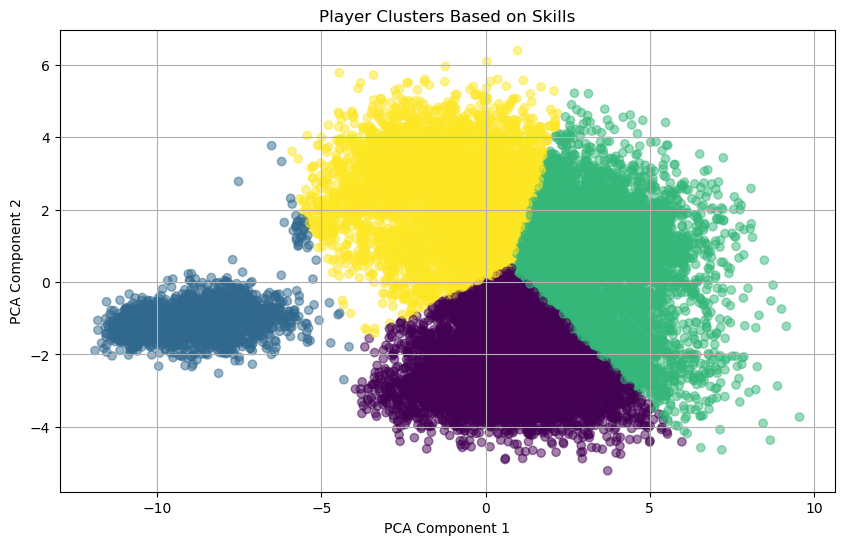

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('Player Clusters Based on Skills')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

In [37]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR()
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    results.append((name, mse, r2))

# Create result table
model_report = pd.DataFrame(results, columns=["Model", "MSE", "R2 Score"]).sort_values(by="R2 Score", ascending=False)
model_report.reset_index(drop=True, inplace=True)
model_report


,Model,MSE,R2 Score
0,Support Vector Regressor,1.925802,0.959241
1,Random Forest,2.278224,0.951782
2,Decision Tree,5.883479,0.875478
3,Linear Regression,8.523610,0.819601
4,Ridge Regression,8.523780,0.819597


***Model Comparison Report: FIFA 20 Overall Rating Prediction***

***Best Model Recommendation***

 ***Challenges Faced and Solutions Applied***

In [ ]:
5. Choosing the Best Model

Challenge:
-->Multiple models (Linear, Ridge, Tree, Forest, SVR) gave different results. Choosing one for production required justification.

Technique Used:
-->Compared models using R² Score and MSE on the same train-test split.

Reason:
-->This ensures fair performance comparison. SVR was chosen for its best combination of accuracy (R² = 0.959) and low error (MSE = 1.93).